<a href="https://colab.research.google.com/github/imji0319/PDSH/blob/master/chap3_IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#영화 리뷰 분류 : 이진 분류 예제
IMDB Dataset : 
영화 리뷰중 양극단의 리뷰로 5만개로 이루어진 데이터셋

train data : 25000

test data : 25000

50% : positive

50% : negative 



In [0]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words =10000) 
#num_words =  N : 훈련 데이터에서 가장 자주 나타나는 단어 N개만 사용
'''
train_data, test_data : 리뷰의 목록, 각 리뷰는 단어 인덱스 리스트 
train_labels, test_labels : 부정 0, 긍정 1 의 리스트 
'''

Using TensorFlow backend.


17465344/17464789 [==============================] - 1s 0us/step


'\ntrain_data, test_data : 리뷰의 목록, 각 리뷰는 단어 인덱스 리스트 \ntrain_labels, test_labels : 부정 0, 긍정 1 의 리스트 \n'

In [0]:
#리뷰 데이터 -> 영어 단어 
word_index = imdb.get_word_index()
reverse_word_index = dict(
                                   [(value, key) for (key, value) in word_index.items()])
decoded_review= ' '.join(
                                [reverse_word_index.get(i-3, '?') for i in train_data[0]])

In [0]:
decoded_review

In [0]:
#숫자 리스트 -> 텐서
#one-hot encoding - 0과 1의 벡터로 변환 

import numpy as np

def vectorize_sequences(sequences, dimension = 10000 ):
  results = np.zeros((len(sequences),dimension))
  
  for i, sequences in enumerate(sequences):
    results[i, sequences] =1.
  
  return results


x_train =vectorize_sequences(train_data)
x_test =vectorize_sequences(test_data)

# 레이블 -> 벡터
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [0]:
#신경망 모델 정의
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape= (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [0]:
#모델 compile
model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [0]:
#training 
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs =20,
                    batch_size = 512,
                    validation_data =(x_val, y_val))
            

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 212us/step - loss: 0.5087 - acc: 0.7815 - val_loss: 0.3799 - val_acc: 0.8693
Epoch 2/20
15000/15000 [==============================] - 3s 177us/step - loss: 0.3007 - acc: 0.9051 - val_loss: 0.3006 - val_acc: 0.8901
Epoch 3/20
15000/15000 [==============================] - 3s 177us/step - loss: 0.2181 - acc: 0.9277 - val_loss: 0.3086 - val_acc: 0.8718
Epoch 4/20
15000/15000 [==============================] - 3s 174us/step - loss: 0.1751 - acc: 0.9434 - val_loss: 0.2840 - val_acc: 0.8838
Epoch 5/20
15000/15000 [==============================] - 3s 177us/step - loss: 0.1427 - acc: 0.9543 - val_loss: 0.2847 - val_acc: 0.8865
Epoch 6/20
15000/15000 [==============================] - 3s 177us/step - loss: 0.1150 - acc: 0.9654 - val_loss: 0.3152 - val_acc: 0.8773
Epoch 7/20
15000/15000 [==============================] - 3s 177us/step - loss: 0.0981 - acc: 0.9703 - val_loss: 0.3127 - 

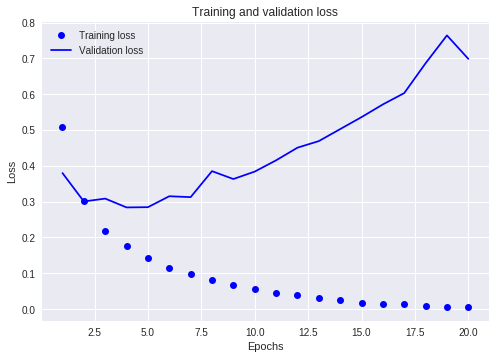

In [0]:
#훈련과 검증 손실 그리기
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1 )

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label ='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

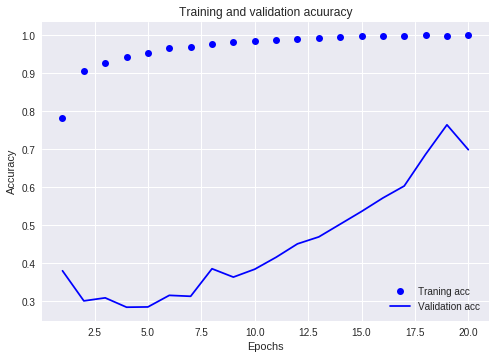

In [0]:
#훈련과 검증 정확도 그리기
plt.clf() # 그래프 초기화
acc = history_dict['acc']
val_acc = history_dict['val_loss']

plt.plot(epochs, acc, 'bo', label = 'Traning acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation acuuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [0]:
#overfitting 문제를 해소하기 위해 epoch 수 감소하여 모델링
model= models.Sequential()
model.add(layers.Dense(16,activation ='relu', input_shape=(10000, )))
model.add(layers.Dense(16,activation= 'relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size = 512)
results = model.evaluate(x_test,y_test)

results

Epoch 1/4
25000/25000 [==============================] - 3s 137us/step - loss: 0.4750 - acc: 0.8127
Epoch 2/4
25000/25000 [==============================] - 3s 128us/step - loss: 0.2697 - acc: 0.9077
Epoch 3/4
25000/25000 [==============================] - 3s 128us/step - loss: 0.2061 - acc: 0.9250
Epoch 4/4
25000/25000 [==============================] - 2s 83us/step


[0.30669708380699157, 0.87916]

In [0]:
#모델 실전 상황에 적용 : 어떤 리뷰가 긍정일 확률 확인 가능 
model.predict(x_test)

array([[0.27984428],
       [0.9999182 ],
       [0.9376882 ],
       ...,
       [0.15763137],
       [0.11919914],
       [0.7660292 ]], dtype=float32)

In [0]:
#추가 실험
'''
3개의 은닉층 사용
층의 은닉 유닛 변명 32유닛
loss -> mse
relu -> tanh 활성화 함수'''

model= models.Sequential()
model.add(layers.Dense(32,activation ='relu', input_shape=(10000, )))
model.add(layers.Dense(32,activation= 'tanh'))
model.add(layers.Dense(32,activation= 'relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss = 'mse',
             metrics = ['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size = 512)
results = model.evaluate(x_test,y_test)

results


Epoch 1/4
25000/25000 [==============================] - 4s 152us/step - loss: 0.1370 - acc: 0.8086
Epoch 2/4
25000/25000 [==============================] - 4s 140us/step - loss: 0.0682 - acc: 0.9120
Epoch 3/4
25000/25000 [==============================] - 3s 139us/step - loss: 0.0525 - acc: 0.9335
Epoch 4/4
25000/25000 [==============================] - 2s 86us/step


[0.09903612161457538, 0.87044]